## Importing important Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,SGDRegressor,LogisticRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\train-chennai-sale.csv")

In [5]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [6]:
dfc = df.copy()

## Data cleaning 

### filling null values

In [7]:
## no of missing values in each column
for i in dfc.columns:
    print('{} has {} missing values'.format(i,dfc[i].isnull().sum()) )

PRT_ID has 0 missing values
AREA has 0 missing values
INT_SQFT has 0 missing values
DATE_SALE has 0 missing values
DIST_MAINROAD has 0 missing values
N_BEDROOM has 1 missing values
N_BATHROOM has 5 missing values
N_ROOM has 0 missing values
SALE_COND has 0 missing values
PARK_FACIL has 0 missing values
DATE_BUILD has 0 missing values
BUILDTYPE has 0 missing values
UTILITY_AVAIL has 0 missing values
STREET has 0 missing values
MZZONE has 0 missing values
QS_ROOMS has 0 missing values
QS_BATHROOM has 0 missing values
QS_BEDROOM has 0 missing values
QS_OVERALL has 48 missing values
REG_FEE has 0 missing values
COMMIS has 0 missing values
SALES_PRICE has 0 missing values


In [8]:
dfc['N_BEDROOM'].fillna(1,inplace = True)

In [9]:
dfc['QS_OVERALL'] = dfc['QS_OVERALL'].fillna(dfc['QS_OVERALL'].interpolate())

In [10]:
dfc['N_BATHROOM'] = dfc['N_BATHROOM'].fillna(1)

In [11]:
dfc['QS_BEDROOM'] = dfc['QS_BEDROOM'].fillna(dfc['QS_BEDROOM'].interpolate())

In [12]:
dfc.drop(['PRT_ID','REG_FEE','COMMIS'],axis = 1,inplace = True)

In [13]:
dfc

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000


### Dropping duplicates 

In [14]:
dfc.drop_duplicates().shape

(7109, 19)

## Converting objects into datetime

In [15]:
dfc['DATE_BUILD'] = pd.to_datetime(dfc['DATE_BUILD'])
dfc['DATE_SALE'] = pd.to_datetime(dfc['DATE_SALE'])

In [16]:
dfc['Age'] = (dfc['DATE_BUILD'] - dfc['DATE_SALE']).abs()

In [17]:
dfc.Age[:-4]

0      16031 days
1       4015 days
2       7152 days
3       8030 days
4      10802 days
          ...    
7100    9152 days
7101   13318 days
7102    7152 days
7103    8760 days
7104   17942 days
Name: Age, Length: 7105, dtype: timedelta64[ns]

## Categorising the values

In [18]:
continuous_values = [i for i in dfc.columns if dfc[i].dtype != 'O' and dfc[i].nunique()>20]

In [19]:
discrete_values = [i for i in dfc.columns if dfc[i].dtype == 'O']

In [20]:
dfc[discrete_values]

,AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,Karapakkam,AbNormal,Yes,Commercial,AllPub,Paved,A
1,Anna Nagar,AbNormal,No,Commercial,AllPub,Gravel,RH
2,Adyar,AbNormal,Yes,Commercial,ELO,Gravel,RL
3,Velachery,Family,No,Others,NoSewr,Paved,I
4,Karapakkam,AbNormal,Yes,Others,AllPub,Gravel,C
...,...,...,...,...,...,...,...
7104,Karapakkam,AdjLand,No,Others,ELO,No Access,RM
7105,Velachery,Family,Yes,Others,NoSeWa,No Access,RH
7106,Velachery,Normal Sale,No,House,NoSeWa,Gravel,I
7107,Karapakkam,Partial,Yes,Commercial,ELO,Paved,RL


In [21]:
for i in discrete_values:
    print('{} has {} unique categories'.format(i,dfc[i].nunique()))

AREA has 17 unique categories
SALE_COND has 9 unique categories
PARK_FACIL has 3 unique categories
BUILDTYPE has 5 unique categories
UTILITY_AVAIL has 5 unique categories
STREET has 5 unique categories
MZZONE has 6 unique categories


In [22]:
dfc

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031 days
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015 days
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152 days
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030 days
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-03-01,51,1.0,1.0,2,AdjLand,No,1962-01-15,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,17942 days
7105,Velachery,1897,2004-08-04,52,3.0,2.0,5,Family,Yes,1995-11-04,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480,3196 days
7106,Velachery,1614,2006-08-25,152,2.0,1.0,4,Normal Sale,No,1978-01-09,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410,10455 days
7107,Karapakkam,787,2009-03-08,40,1.0,1.0,2,Partial,Yes,1977-11-08,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,11443 days


In [23]:
categorical_values = [i for i in dfc.columns if dfc[i].nunique()<20]

In [24]:
categorical_values = categorical_values  + discrete_values

## Replacing duplicate values

In [25]:
dfc

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031 days
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015 days
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152 days
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030 days
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-03-01,51,1.0,1.0,2,AdjLand,No,1962-01-15,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,17942 days
7105,Velachery,1897,2004-08-04,52,3.0,2.0,5,Family,Yes,1995-11-04,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480,3196 days
7106,Velachery,1614,2006-08-25,152,2.0,1.0,4,Normal Sale,No,1978-01-09,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410,10455 days
7107,Karapakkam,787,2009-03-08,40,1.0,1.0,2,Partial,Yes,1977-11-08,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,11443 days


In [26]:
for i in discrete_values:
    print(df[i].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [27]:
df['AREA'].replace(['Karapakam','Adyr','Velchery','KK Nagar','T Nagar'],['Karapakkam','Adyar','Velachery','KKNagar','TNagar'],inplace =True)

In [28]:
df['AREA'].replace(['Ana Nagar','Ann Nagar'],'Anna Nagar',inplace =True)

In [29]:
df['AREA'].replace(['Chormpet','Chrompt','Chrmpet'],'Chrompet',inplace =True)

In [30]:
df['SALE_COND'].replace(['Ab Normal','Adj Land'],['AbNormal','AdjLand'],inplace =True)

In [31]:
df['SALE_COND'].replace(['Partiall', 'PartiaLl'],'Partial',inplace =True)

In [32]:
df['PARK_FACIL'].replace('Noo','No',inplace =True)

In [33]:
df['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others' ],inplace =True)

In [34]:
df['UTILITY_AVAIL'].replace(['All Pub','NoSewr '],['AllPub','NoSeWa'],inplace =True)

In [35]:
df['STREET'].replace(['Pavd', 'No Access'],['Paved','NoAccess'],inplace =True)

# EDA

In [36]:
datecols = ['DATE_SALE','DATE_BUILD','Age']

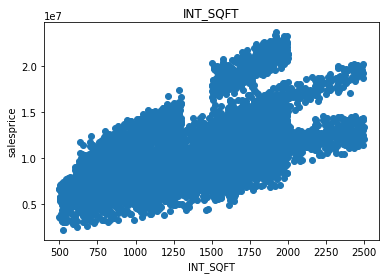

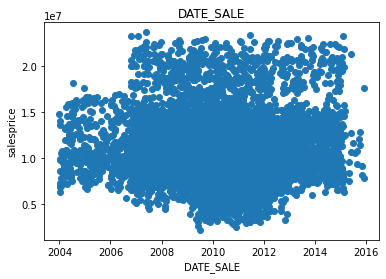

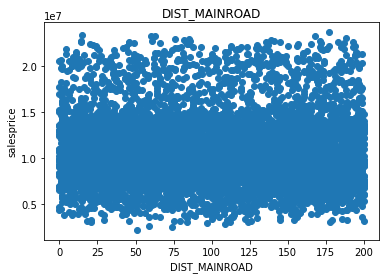

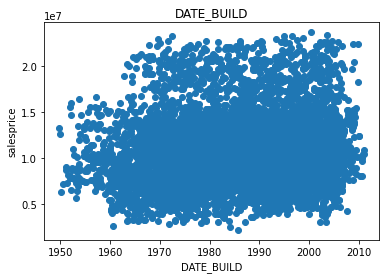

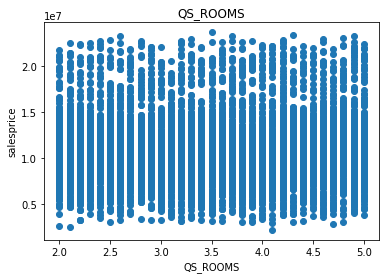

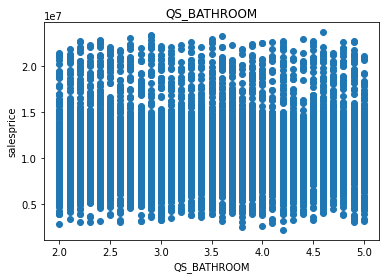

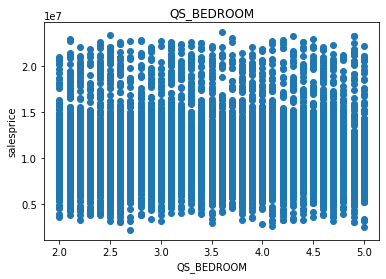

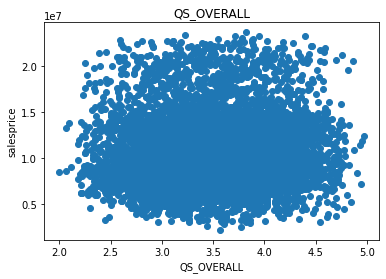

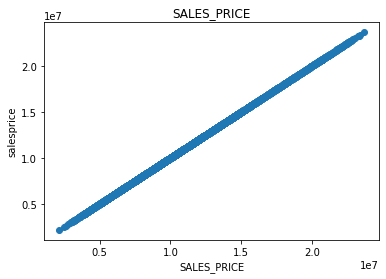

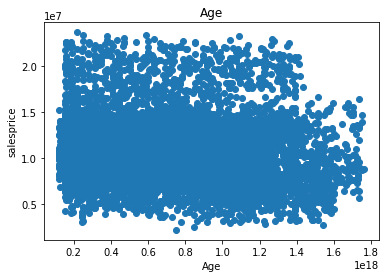

In [37]:
for i in continuous_values:
    plt.scatter(i,'SALES_PRICE',data = dfc)
    plt.xlabel(i)
    plt.ylabel('salesprice')
    plt.title(i)
    plt.show()

In [38]:
for i in datecols:
    if i in continuous_values:
        continuous_values.remove(i)

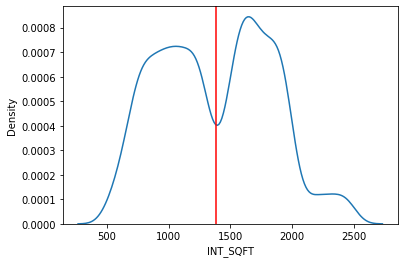

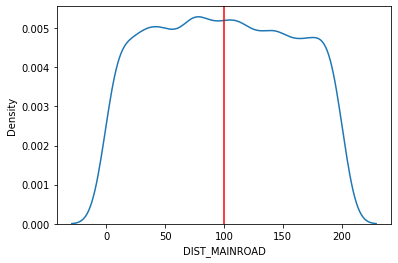

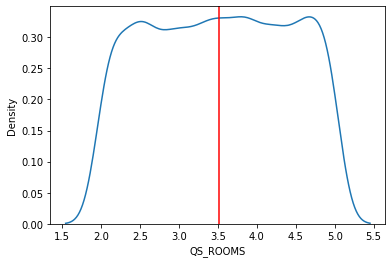

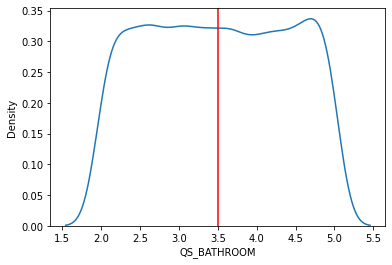

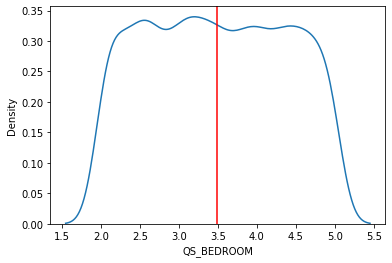

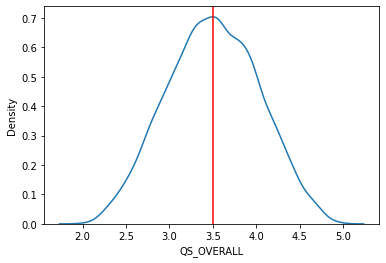

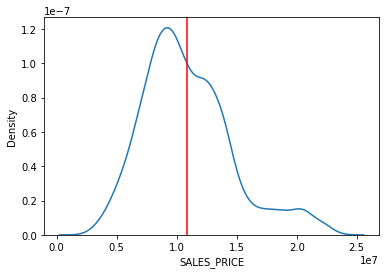

In [39]:
for i in continuous_values:
        sns.kdeplot(dfc[i])
        plt.axvline(dfc[i].mean(),color = 'r')
        plt.show()

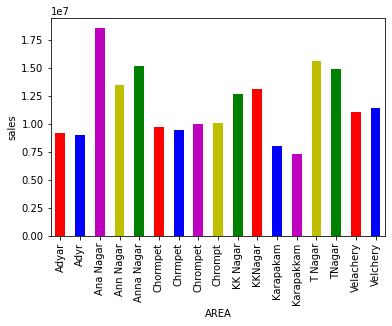

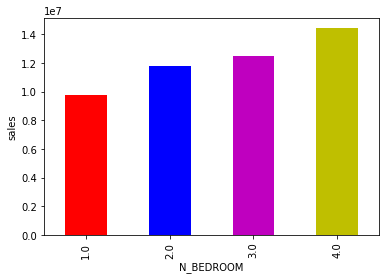

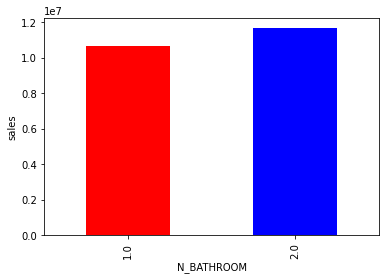

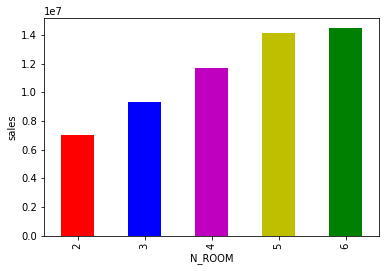

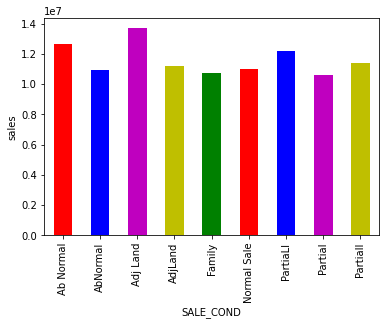

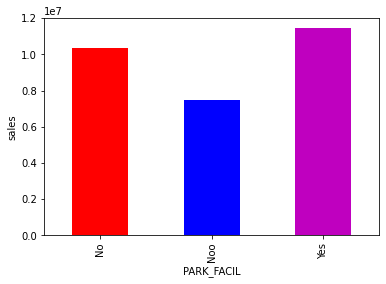

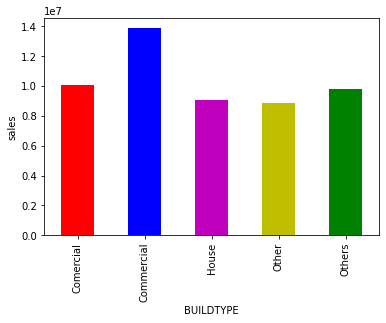

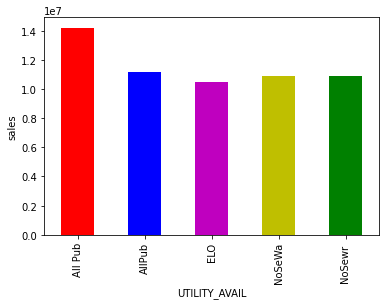

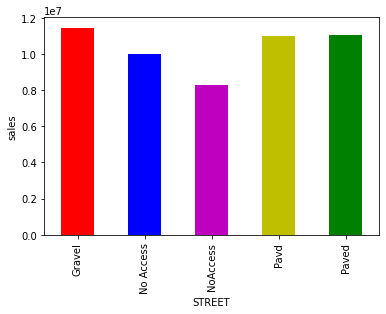

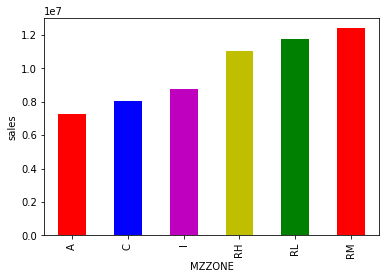

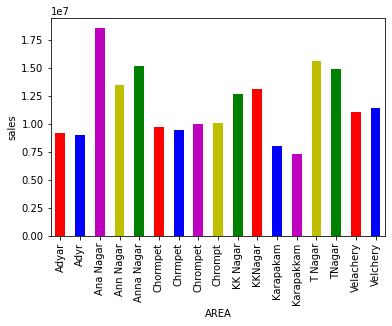

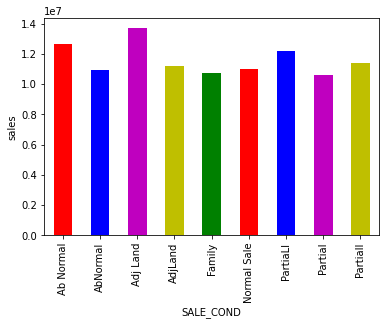

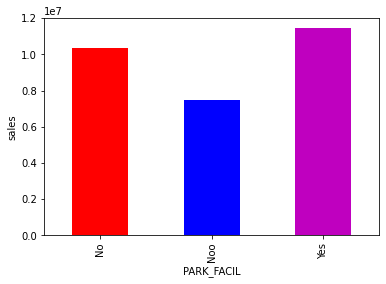

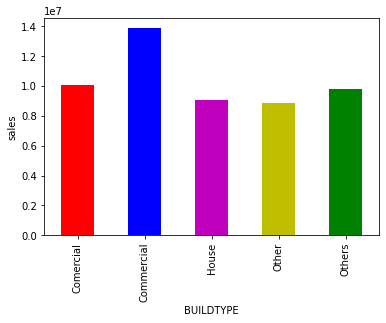

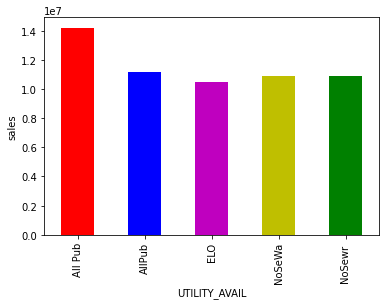

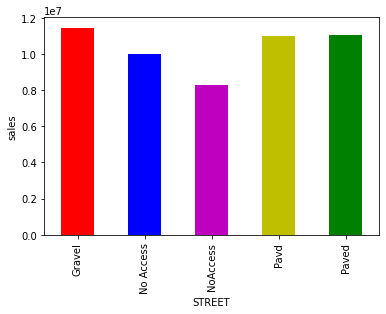

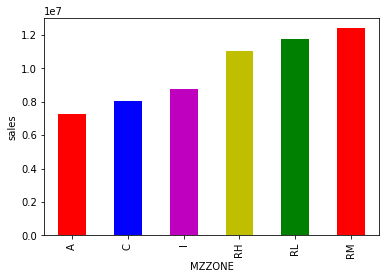

In [40]:
for i in categorical_values:
    dfca = dfc.copy()
    dfca.groupby(i)['SALES_PRICE'].mean().plot.bar(color = ['r','b','m','y','g'])
    plt.ylabel('sales')
    plt.xlabel(i)
    plt.show()

In [41]:
dfc['Age'] = dfc['Age'].astype('str')

In [42]:
for i in discrete_values:
    print(df[i].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KKNagar'
 'TNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
['Yes' 'No']
['Commercial' 'Others' 'House']
['AllPub' 'ELO' 'NoSeWa']
['Paved' 'Gravel' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [43]:
dfc['Age'] = dfc['Age'].str[:-4]

In [44]:
dfc['Age'] = dfc['Age'].astype('int')

In [45]:
dfc.drop(['DATE_SALE','DATE_BUILD'],inplace = True,axis = 1)

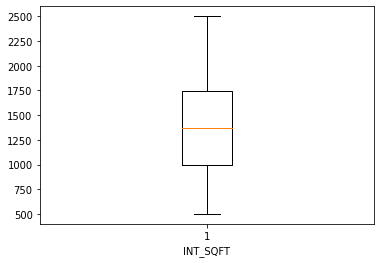

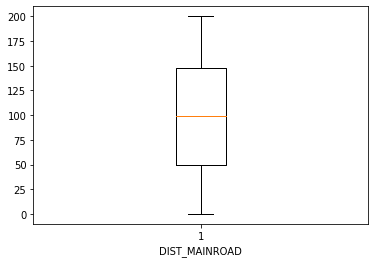

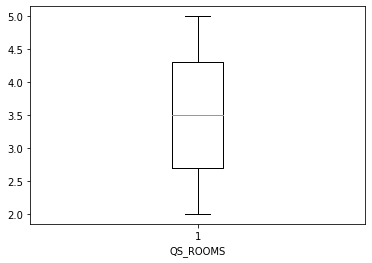

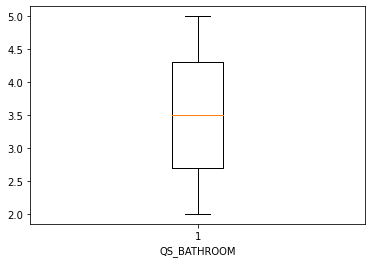

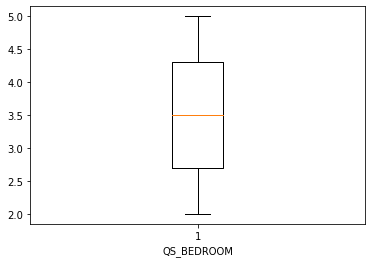

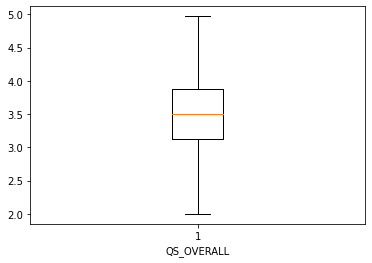

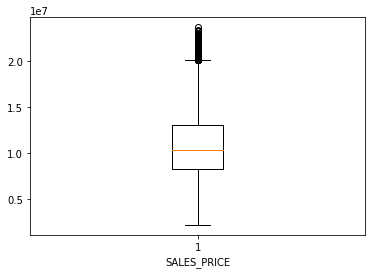

In [46]:
for i in continuous_values:
    plt.boxplot(dfc[i])
    plt.xlabel(i)
    plt.show()

In [47]:
dfc

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,8030
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,17942
7105,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480,3196
7106,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410,10455
7107,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,11443


## Label encoding 

In [48]:
encoder = LabelEncoder()
for i in discrete_values:
    dfc[i]=encoder.fit_transform(dfc[i])

## Data Engineering and feature selection

In [49]:
x = dfc[[i for i in dfc.columns if i!='SALES_PRICE']]
y = dfc['SALES_PRICE']

In [50]:
select = SelectFromModel(Lasso(alpha = 0.5,random_state = 10))

In [51]:
selected = select.fit(x,y)

In [52]:
selected.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [53]:
clf = RandomForestRegressor()
clf.fit(x,y)


RandomForestRegressor()

In [54]:
listr = clf.feature_importances_

In [55]:
listr

array([0.08125787, 0.39869029, 0.00198862, 0.02996298, 0.00864319,
       0.00553588, 0.00156969, 0.0146313 , 0.31619246, 0.00087585,
       0.00739309, 0.12146009, 0.00177047, 0.00185757, 0.00175531,
       0.001856  , 0.00455937])

In [56]:
clft = DecisionTreeRegressor()
clft.fit(x,y)
listt = clft.feature_importances_

In [57]:
listt

array([0.07106685, 0.39555586, 0.00155411, 0.03201278, 0.00613019,
       0.00645764, 0.00147122, 0.01579805, 0.32026362, 0.00068906,
       0.00848539, 0.13102801, 0.00122168, 0.00141498, 0.00139649,
       0.00142626, 0.00402783])

In [58]:
features = pd.DataFrame()

In [59]:
features['RandomForest'] = listr
features['DecisionTree'] = listt

In [60]:
features['colnames'] = list(x.columns)

In [61]:
features.sort_values(['RandomForest','DecisionTree'],ascending = False)

,RandomForest,DecisionTree,colnames
1,0.398690,0.395556,INT_SQFT
8,0.316192,0.320264,BUILDTYPE
11,0.121460,0.131028,MZZONE
0,0.081258,0.071067,AREA
3,0.029963,0.032013,N_BEDROOM
7,0.014631,0.015798,PARK_FACIL
4,0.008643,0.006130,N_BATHROOM
10,0.007393,0.008485,STREET
5,0.005536,0.006458,N_ROOM
16,0.004559,0.004028,Age


## Splitting into training and testing data

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state = 10)

## Standardizing 

In [63]:
scaler = MinMaxScaler()
tx_train = scaler.fit_transform(x_train)
tx_test = scaler.transform(x_test)

## Model Building 

## 1 Linear Regression

In [64]:
model = LinearRegression()
model.fit(tx_train,y_train)
model.score(tx_test,y_test)


0.7401962788028282

## 2. SGDRegressor (Gradient Descent)

In [65]:
models = SGDRegressor()
models.fit(tx_train,y_train)
models.score(tx_test,y_test)

0.739212133907855

## 3.DecisionTree

### Providing max_depth = 5 to avoid overfitting because the gini entropy is negligible

In [66]:
modelt = DecisionTreeRegressor(max_depth = 5)
modelt.fit(tx_train,y_train)
modelt.score(tx_test,y_test)

0.8633979750825771

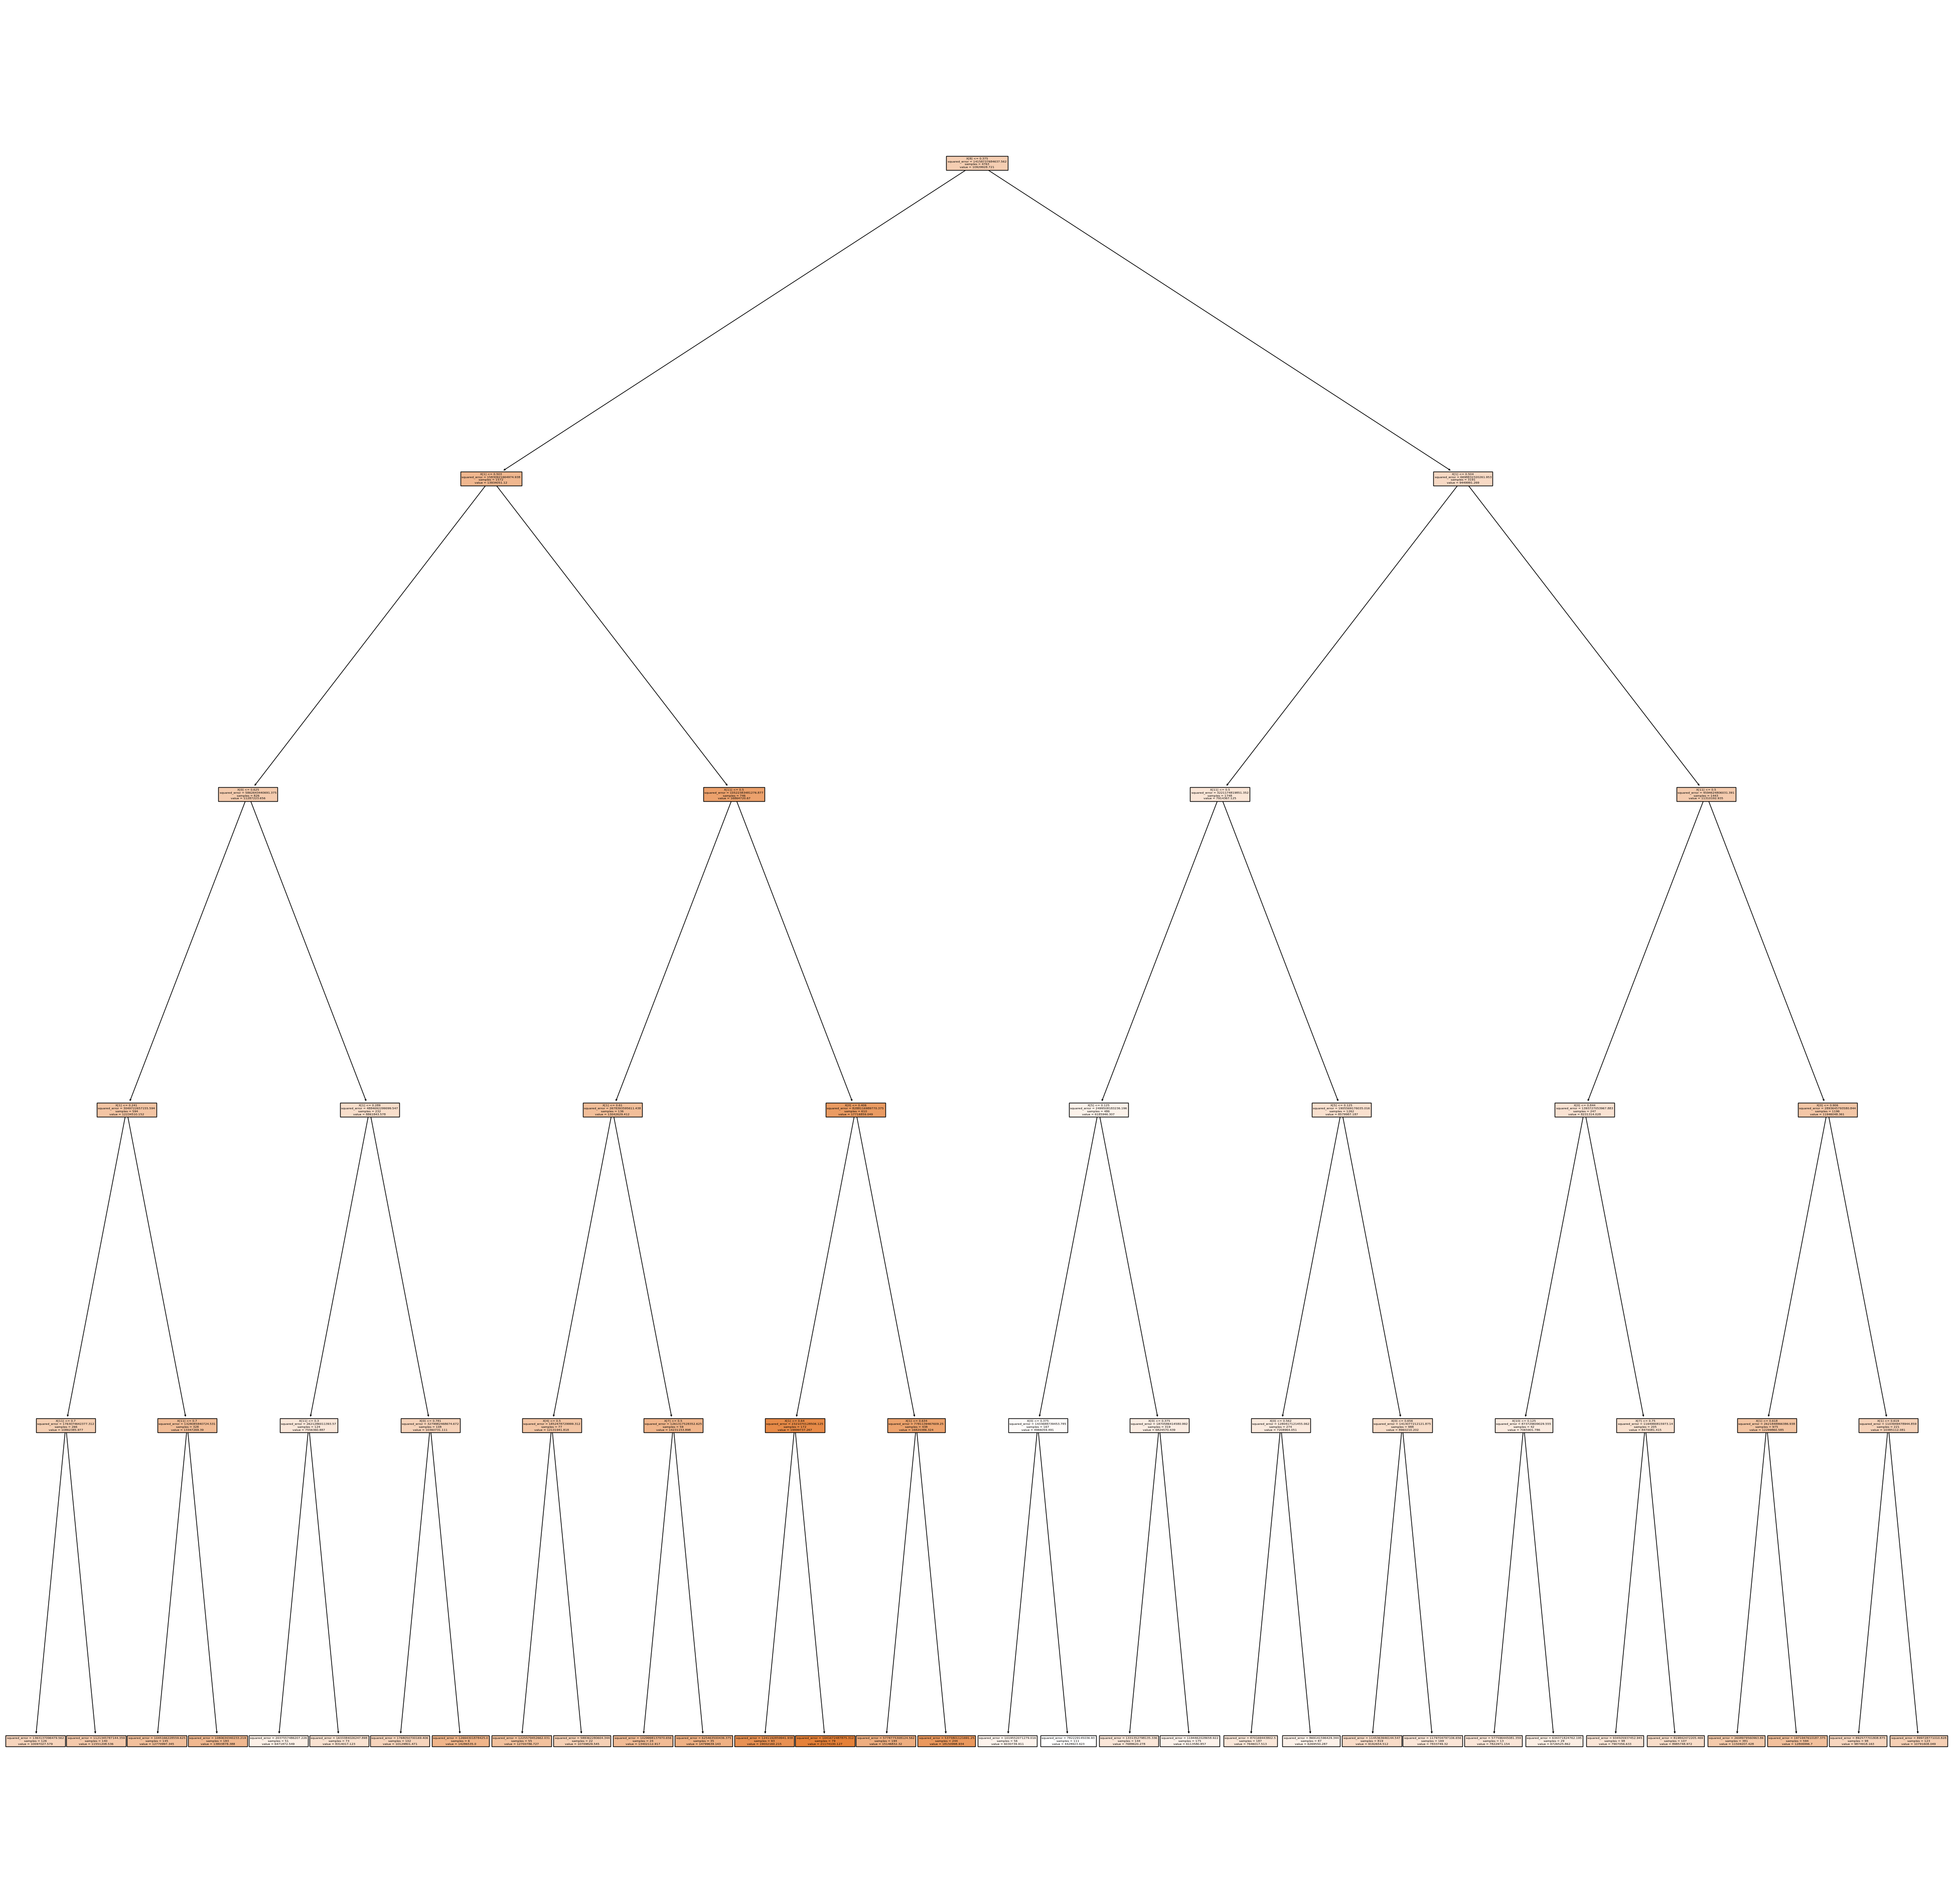

In [67]:
plt.figure(figsize = (50,50),dpi = 100)
tree.plot_tree(modelt,filled = True)
plt.show()

## 4.RandomForestRegressor

In [68]:
modelr = RandomForestRegressor()
modelr.fit(tx_train,y_train)
modelr.score(tx_test,y_test)

0.9788656263729387

## 5.Xgboost

In [69]:
modelx = XGBRegressor()
modelx.fit(tx_train,y_train)
modelx.score(tx_test,y_test)

0.993561074204915

## 6.KNN

In [70]:
kscore = []
for i in range(1,30):
  modelk = KNeighborsRegressor(n_neighbors=i)
  modelk.fit(tx_train,y_train)
  score = modelk.score(tx_test,y_test)
  kscore.append(score)

Text(0, 0.5, 'Accuracy')

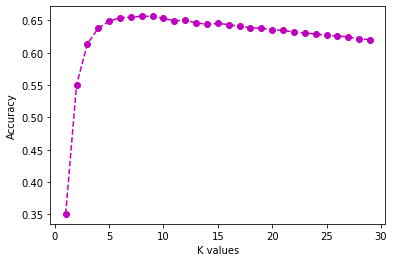

In [71]:
plt.plot(range(1,30),kscore,marker = 'o',color = 'm',linestyle = '--')
plt.xlabel('K values')
plt.ylabel('Accuracy')

### The best k value is 7 from the figure

In [72]:

modelk = KNeighborsRegressor(n_neighbors=7)
modelk.fit(tx_train,y_train)
modelk.score(tx_test,y_test)
 

0.6549099948225354

### By the above models we can see that xgboost has performed well but to check further with different portions of the dataset i am using cross_val_score

In [73]:
kfold = KFold(10)
clf = [LinearRegression(),SGDRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),XGBRegressor(),KNeighborsRegressor(n_neighbors = 7)]
names = ['LinearRegression','gradientdescent','decisiontreeregressor','randomforest','xgboost','knn']

In [74]:
final_scores = []
for i,k in zip(clf,names):
    score = cross_val_score(i,x,y,cv = kfold)
    final_scores.append(np.round(score.mean(),3))

In [75]:
final_scores

[0.736, -3.205040791243284e+19, 0.957, 0.981, 0.995, 0.343]

In [76]:
outcome = pd.DataFrame()

In [77]:
outcome['models'] = names
outcome['results'] = final_scores

In [78]:
outcome.sort_values(by = 'results',ascending =False)

,models,results
4,xgboost,9.950000e-01
3,randomforest,9.810000e-01
2,decisiontreeregressor,9.570000e-01
0,LinearRegression,7.360000e-01
5,knn,3.430000e-01
1,gradientdescent,-3.205041e+19


## The final conclusion is xgboost is giving the accuracy of 99% 